In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from pathlib import Path

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
sns.set_style('darkgrid')

print("✅ Libraries loaded successfully!")


✅ Libraries loaded successfully!


In [6]:
# Define data paths
base_path = Path('virginia-international-raceway/VIR/Race 1')

# Load key files
telemetry = pd.read_csv(base_path / 'R1_vir_telemetry_data.csv')
lap_times = pd.read_csv(base_path / 'vir_lap_time_R1.csv')
lap_start = pd.read_csv(base_path / 'vir_lap_start_R1.csv')
lap_end = pd.read_csv(base_path / 'vir_lap_end_R1.csv')
sections = pd.read_csv(base_path / '23_AnalysisEnduranceWithSections_Race 1_Anonymized.CSV')
best_laps = pd.read_csv(base_path / '99_Best 10 Laps By Driver_Race 1_Anonymized.CSV')
results = pd.read_csv(base_path / '03_Results GR Cup Race 1 Official_Anonymized.CSV')

print(f"Telemetry shape: {telemetry.shape}")
print(f"Lap times shape: {lap_times.shape}")
print(f"Sections shape: {sections.shape}")
print(f"Best laps shape: {best_laps.shape}")


Telemetry shape: (11401181, 13)
Lap times shape: (483, 10)
Sections shape: (415, 1)
Best laps shape: (23, 1)


In [10]:
# Check telemetry columns
print("Telemetry columns:")
print(telemetry.columns.tolist())
print("\nFirst few rows:")
telemetry.head()

Telemetry columns:
['expire_at', 'lap', 'meta_event', 'meta_session', 'meta_source', 'meta_time', 'original_vehicle_id', 'outing', 'telemetry_name', 'telemetry_value', 'timestamp', 'vehicle_id', 'vehicle_number']

First few rows:


,expire_at,lap,meta_event,meta_session,meta_source,meta_time,original_vehicle_id,outing,telemetry_name,telemetry_value,timestamp,vehicle_id,vehicle_number
0,NaN,1,I_R04_2025-07-20,R1,kafka:gr-raw,2025-07-19T18:06:40.175Z,GR86-002-2,0,accx_can,0.217,2025-07-17T19:16:54.077Z,GR86-002-2,2
1,NaN,1,I_R04_2025-07-20,R1,kafka:gr-raw,2025-07-19T18:06:40.175Z,GR86-002-2,0,accy_can,-0.190,2025-07-17T19:16:54.077Z,GR86-002-2,2
2,NaN,1,I_R04_2025-07-20,R1,kafka:gr-raw,2025-07-19T18:06:40.175Z,GR86-002-2,0,ath,100.020,2025-07-17T19:16:54.077Z,GR86-002-2,2
3,NaN,1,I_R04_2025-07-20,R1,kafka:gr-raw,2025-07-19T18:06:40.175Z,GR86-002-2,0,pbrake_r,0.000,2025-07-17T19:16:54.077Z,GR86-002-2,2
4,NaN,1,I_R04_2025-07-20,R1,kafka:gr-raw,2025-07-19T18:06:40.175Z,GR86-002-2,0,pbrake_f,0.000,2025-07-17T19:16:54.077Z,GR86-002-2,2


In [11]:
# Check lap times structure
print("Lap times columns:")
print(lap_times.columns.tolist())
print("\nFirst few rows:")
lap_times.head()


Lap times columns:
['expire_at', 'lap', 'meta_event', 'meta_session', 'meta_source', 'meta_time', 'outing', 'timestamp', 'value', 'vehicle_id']

First few rows:


,expire_at,lap,meta_event,meta_session,meta_source,meta_time,outing,timestamp,value,vehicle_id
0,NaN,21,I_R04_2025-07-20,R1,kafka:gr-raw,2025-07-19T18:52:40.070Z,0,2025-07-19T18:52:39.248Z,43,GR86-002-2
1,NaN,22,I_R04_2025-07-20,R1,kafka:gr-raw,2025-07-19T18:52:40.069Z,0,2025-07-19T18:52:39.218Z,0,GR86-002-2
2,NaN,21,I_R04_2025-07-20,R1,kafka:gr-raw,2025-07-19T18:52:40.069Z,0,2025-07-19T18:52:39.217Z,129228,GR86-002-2
3,NaN,20,I_R04_2025-07-20,R1,kafka:gr-raw,2025-07-19T18:50:32.258Z,0,2025-07-19T18:50:30.197Z,129469,GR86-002-2
4,NaN,19,I_R04_2025-07-20,R1,kafka:gr-raw,2025-07-19T18:48:23.664Z,0,2025-07-19T18:48:20.578Z,130043,GR86-002-2


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pathlib import Path

base_path = Path('virginia-international-raceway/VIR/Race 1')

# Load lap times
lap_times = pd.read_csv(base_path / 'vir_lap_time_R1.csv')

print("Lap times columns:", lap_times.columns.tolist())
print("\nFirst rows:")
print(lap_times.head(10))

# Convert value from milliseconds to seconds
lap_times['lap_time_sec'] = lap_times['value'] / 1000

print("\nLap time statistics (seconds):")
print(lap_times['lap_time_sec'].describe())


Lap times columns: ['expire_at', 'lap', 'meta_event', 'meta_session', 'meta_source', 'meta_time', 'outing', 'timestamp', 'value', 'vehicle_id']

First rows:
   expire_at  lap        meta_event meta_session   meta_source  \
0        NaN   21  I_R04_2025-07-20           R1  kafka:gr-raw   
1        NaN   22  I_R04_2025-07-20           R1  kafka:gr-raw   
2        NaN   21  I_R04_2025-07-20           R1  kafka:gr-raw   
3        NaN   20  I_R04_2025-07-20           R1  kafka:gr-raw   
4        NaN   19  I_R04_2025-07-20           R1  kafka:gr-raw   
5        NaN   18  I_R04_2025-07-20           R1  kafka:gr-raw   
6        NaN   17  I_R04_2025-07-20           R1  kafka:gr-raw   
7        NaN   16  I_R04_2025-07-20           R1  kafka:gr-raw   
8        NaN   15  I_R04_2025-07-20           R1  kafka:gr-raw   
9        NaN   14  I_R04_2025-07-20           R1  kafka:gr-raw   

                  meta_time  outing                 timestamp   value  \
0  2025-07-19T18:52:40.070Z       0  2025-0

In [13]:
# Remove outliers (warmup laps, pit laps)
# Typical VIR lap is around 120-135 seconds
lap_times_clean = lap_times[(lap_times['lap_time_sec'] > 100) & 
                             (lap_times['lap_time_sec'] < 150)].copy()

print(f"Total laps: {len(lap_times)}")
print(f"Clean laps: {len(lap_times_clean)}")
print(f"\nUnique vehicles: {lap_times_clean['vehicle_id'].nunique()}")

# Average lap time by vehicle
vehicle_summary = lap_times_clean.groupby('vehicle_id')['lap_time_sec'].agg([
    ('avg_lap', 'mean'),
    ('best_lap', 'min'),
    ('std', 'std'),
    ('laps', 'count')
]).round(3).sort_values('avg_lap')

print("\n=== Top 10 Fastest Drivers (Average Lap Time) ===")
print(vehicle_summary.head(10))

# Save fastest driver ID for later
fastest_driver = vehicle_summary.index[0]
print(f"\n🏆 Fastest driver: {fastest_driver}")


Total laps: 483
Clean laps: 336

Unique vehicles: 21

=== Top 10 Fastest Drivers (Average Lap Time) ===
             avg_lap  best_lap    std  laps
vehicle_id                                 
GR86-036-98  128.173   117.021  9.782     3
GR86-033-46  129.747   128.464  1.312    18
GR86-026-72  129.785   128.500  1.536    18
GR86-006-7   129.863   128.674  1.912    18
GR86-022-13  129.883   128.490  1.792    18
GR86-016-55  130.126   128.523  1.222    18
GR86-047-21  130.793   129.293  1.558    18
GR86-015-31  130.810   129.000  1.582    18
GR86-002-2   130.843   128.974  4.162    18
GR86-051-71  131.027   129.130  2.087    17

🏆 Fastest driver: GR86-036-98


In [14]:
# Plot lap progression for top 5 drivers
top_5_drivers = vehicle_summary.head(5).index.tolist()
lap_times_top5 = lap_times_clean[lap_times_clean['vehicle_id'].isin(top_5_drivers)]

fig = px.line(lap_times_top5, 
              x='lap', 
              y='lap_time_sec',
              color='vehicle_id',
              title='Lap Times - Top 5 Drivers',
              labels={'lap_time_sec': 'Lap Time (seconds)', 'lap': 'Lap Number'})
fig.show()

# Box plot comparison
fig2 = px.box(lap_times_top5, 
              x='vehicle_id', 
              y='lap_time_sec',
              title='Lap Time Distribution - Top 5 Drivers')
fig2.show()


In [17]:
# Load telemetry (just a sample to understand structure)
telemetry = pd.read_csv(base_path / 'R1_vir_telemetry_data.csv', nrows=100000)

print(f"Telemetry shape: {telemetry.shape}")
print("\nAvailable telemetry parameters:")
print(telemetry['telemetry_name'].unique())

print("\nSample telemetry data:")
print(telemetry.head(20))


Telemetry shape: (100000, 13)

Available telemetry parameters:
['accx_can' 'accy_can' 'ath' 'pbrake_r' 'pbrake_f' 'gear' 'Steering_Angle'
 'speed' 'nmot']

Sample telemetry data:
    expire_at  lap        meta_event meta_session   meta_source  \
0         NaN    1  I_R04_2025-07-20           R1  kafka:gr-raw   
1         NaN    1  I_R04_2025-07-20           R1  kafka:gr-raw   
2         NaN    1  I_R04_2025-07-20           R1  kafka:gr-raw   
3         NaN    1  I_R04_2025-07-20           R1  kafka:gr-raw   
4         NaN    1  I_R04_2025-07-20           R1  kafka:gr-raw   
5         NaN    1  I_R04_2025-07-20           R1  kafka:gr-raw   
6         NaN    1  I_R04_2025-07-20           R1  kafka:gr-raw   
7         NaN    1  I_R04_2025-07-20           R1  kafka:gr-raw   
8         NaN    1  I_R04_2025-07-20           R1  kafka:gr-raw   
9         NaN    1  I_R04_2025-07-20           R1  kafka:gr-raw   
10        NaN    1  I_R04_2025-07-20           R1  kafka:gr-raw   
11        NaN    

In [20]:
# Load small sample and check all parameters
telemetry_sample = pd.read_csv(base_path / 'R1_vir_telemetry_data.csv', nrows=50000)
params = telemetry_sample['telemetry_name'].unique()

print("=== ALL TELEMETRY PARAMETERS ===")
for i, param in enumerate(sorted(params), 1):
    # Count how many values for this parameter
    count = telemetry_sample[telemetry_sample['telemetry_name'] == param].shape[0]
    print(f"{i:2d}. {param:20s} - {count:6d} data points")


=== ALL TELEMETRY PARAMETERS ===
 1. Steering_Angle       -   6756 data points
 2. accx_can             -   6757 data points
 3. accy_can             -   6757 data points
 4. ath                  -   6757 data points
 5. gear                 -   6757 data points
 6. nmot                 -   1351 data points
 7. pbrake_f             -   6757 data points
 8. pbrake_r             -   6757 data points
 9. speed                -   1351 data points


In [21]:
# Let's pick a driver with more laps - GR86-033-46 has 18 laps
target_driver = 'GR86-033-46'  # Second fastest with 18 laps
target_lap = 10  # Middle lap

print(f"Loading telemetry for {target_driver}, Lap {target_lap}...")

# Load full telemetry (this may take a minute)
telemetry_full = pd.read_csv(base_path / 'R1_vir_telemetry_data.csv')

# Filter for specific driver and lap
sample_telemetry = telemetry_full[
    (telemetry_full['vehicle_id'] == target_driver) & 
    (telemetry_full['lap'] == target_lap)
].copy()

print(f"Sample size: {len(sample_telemetry)} rows")
print(f"Unique parameters: {sample_telemetry['telemetry_name'].nunique()}")

# Pivot to wide format
telemetry_wide = sample_telemetry.pivot_table(
    index=['timestamp', 'vehicle_id', 'lap'],
    columns='telemetry_name',
    values='telemetry_value',
    aggfunc='first'
).reset_index()

print(f"\nPivoted shape: {telemetry_wide.shape}")
print(f"Columns: {telemetry_wide.columns.tolist()}")
telemetry_wide.head()


Loading telemetry for GR86-033-46, Lap 10...
Sample size: 19978 rows
Unique parameters: 9

Pivoted shape: (2641, 12)
Columns: ['timestamp', 'vehicle_id', 'lap', 'Steering_Angle', 'accx_can', 'accy_can', 'ath', 'gear', 'nmot', 'pbrake_f', 'pbrake_r', 'speed']


telemetry_name,timestamp,vehicle_id,lap,Steering_Angle,accx_can,accy_can,ath,gear,nmot,pbrake_f,pbrake_r,speed
0,2025-07-17T19:58:24.360Z,GR86-033-46,10,-8.2,0.079,-0.371,99.87,5.0,NaN,0.0,0.0,NaN
1,2025-07-17T19:58:24.403Z,GR86-033-46,10,-7.9,0.075,-0.368,99.87,5.0,NaN,0.0,0.0,NaN
2,2025-07-17T19:58:24.446Z,GR86-033-46,10,-7.9,0.063,-0.379,99.87,5.0,NaN,0.0,0.0,NaN
3,2025-07-17T19:58:24.489Z,GR86-033-46,10,-7.9,0.099,-0.346,99.87,5.0,6688.0,0.0,0.0,NaN
4,2025-07-17T19:58:24.532Z,GR86-033-46,10,-7.9,0.057,-0.374,99.88,5.0,NaN,0.0,0.0,196.87


In [22]:
# Plot speed trace
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=telemetry_wide.index,
    y=telemetry_wide['speed'],
    mode='lines',
    name='Speed'
))
fig.update_layout(
    title=f'Speed Trace - {target_driver} - Lap {target_lap}',
    xaxis_title='Data Point',
    yaxis_title='Speed',
    height=400
)
fig.show()


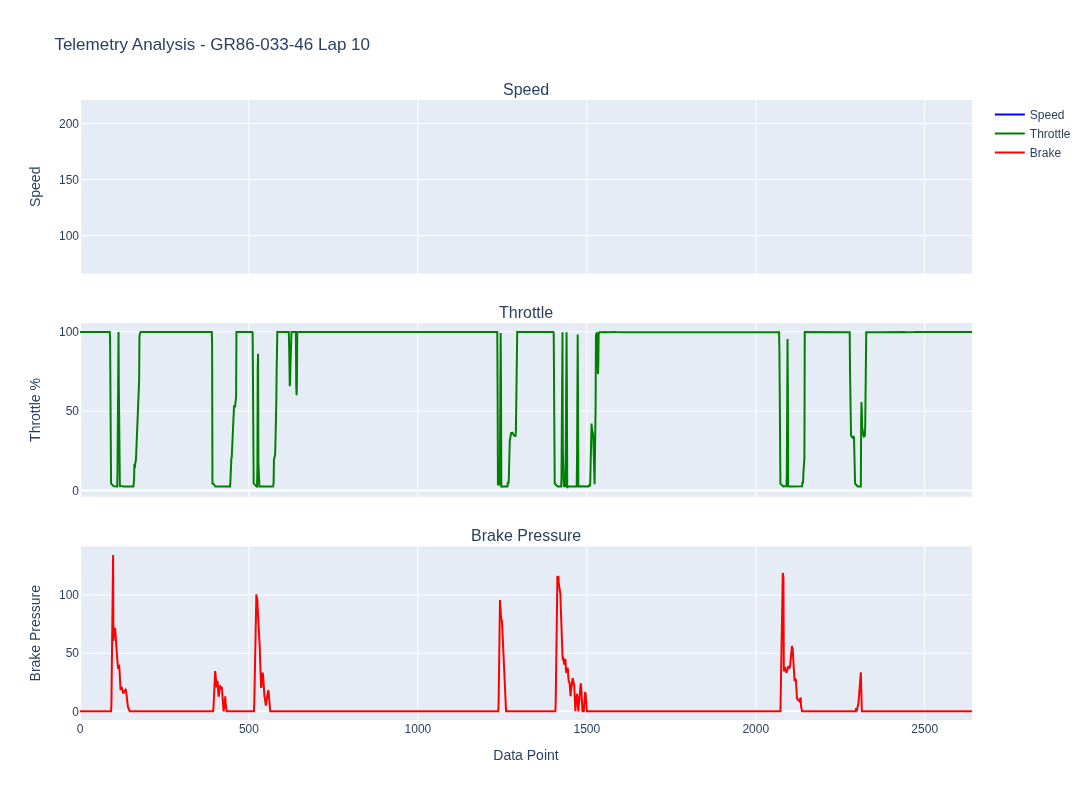

In [23]:
# Create subplot with speed, throttle, brake
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=3, cols=1,
    subplot_titles=('Speed', 'Throttle', 'Brake Pressure'),
    shared_xaxes=True,
    vertical_spacing=0.08
)

# Speed
fig.add_trace(
    go.Scatter(x=telemetry_wide.index, y=telemetry_wide['speed'], 
               name='Speed', line=dict(color='blue')),
    row=1, col=1
)

# Throttle
fig.add_trace(
    go.Scatter(x=telemetry_wide.index, y=telemetry_wide['ath'], 
               name='Throttle', line=dict(color='green')),
    row=2, col=1
)

# Brake
fig.add_trace(
    go.Scatter(x=telemetry_wide.index, y=telemetry_wide['pbrake_f'], 
               name='Brake', line=dict(color='red')),
    row=3, col=1
)

fig.update_layout(height=800, title_text=f"Telemetry Analysis - {target_driver} Lap {target_lap}")
fig.update_yaxes(title_text="Speed", row=1, col=1)
fig.update_yaxes(title_text="Throttle %", row=2, col=1)
fig.update_yaxes(title_text="Brake Pressure", row=3, col=1)
fig.update_xaxes(title_text="Data Point", row=3, col=1)

fig.show()


In [24]:
# Save summary for tomorrow
summary = {
    'fastest_drivers': vehicle_summary.head(5).to_dict(),
    'telemetry_params': ['Steering_Angle', 'accx_can', 'accy_can', 'ath', 'gear', 
                         'nmot', 'pbrake_f', 'pbrake_r', 'speed'],
    'corners_identified': '8-9 corners visible in throttle trace',
    'data_quality': 'Good - throttle and brake data clean, speed has NaN issues',
    'next_steps': 'Extract corner features for ML'
}

import json
with open('day1_summary.json', 'w') as f:
    json.dump(summary, f, indent=2)
    
print("✅ Day 1 Complete! Summary saved.")
print("\n=== Key Findings ===")
print("- 21 drivers, fastest is GR86-036-98")
print("- ~8-9 corners per lap visible in telemetry")
print("- Clean throttle/brake data for feature extraction")
print("- Speed has NaN issues, but throttle/brake/acceleration are perfect")
print("\n=== Tomorrow's Focus ===")
print("1. Identify corner boundaries automatically")
print("2. Extract features: brake point, apex speed, exit speed per corner")
print("3. Build Random Forest model to predict lap times")
print("4. Calculate which corners cost the most time")


✅ Day 1 Complete! Summary saved.

=== Key Findings ===
- 21 drivers, fastest is GR86-036-98
- ~8-9 corners per lap visible in telemetry
- Clean throttle/brake data for feature extraction
- Speed has NaN issues, but throttle/brake/acceleration are perfect

=== Tomorrow's Focus ===
1. Identify corner boundaries automatically
2. Extract features: brake point, apex speed, exit speed per corner
3. Build Random Forest model to predict lap times
4. Calculate which corners cost the most time


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from pathlib import Path
from scipy.signal import find_peaks

# Paths
base_path = Path('virginia-international-raceway/VIR/Race 1')

# Load lap times (we already know the clean range)
lap_times = pd.read_csv(base_path / 'vir_lap_time_R1.csv')
lap_times['lap_time_sec'] = lap_times['value'] / 1000
lap_times_clean = lap_times[(lap_times['lap_time_sec'] > 100) & 
                            (lap_times['lap_time_sec'] < 150)].copy()

# Top 5 drivers
top_5 = lap_times_clean.groupby('vehicle_id')['lap_time_sec'].mean().nsmallest(5).index.tolist()
print("🏁 Top 5 Drivers:", top_5)

# Load full telemetry
print("Loading telemetry... (may take 30 sec)")
telemetry = pd.read_csv(base_path / 'R1_vir_telemetry_data.csv')
print(f"✅ Loaded {len(telemetry):,} telemetry rows")


🏁 Top 5 Drivers: ['GR86-036-98', 'GR86-033-46', 'GR86-026-72', 'GR86-006-7', 'GR86-022-13']
Loading telemetry... (may take 30 sec)
✅ Loaded 11,401,181 telemetry rows


In [28]:
def get_lap_telemetry(telemetry_df, vehicle_id, lap_num):
    """Extract and pivot telemetry for one lap"""
    lap_data = telemetry_df[
        (telemetry_df['vehicle_id'] == vehicle_id) & 
        (telemetry_df['lap'] == lap_num)
    ].copy()
    
    if len(lap_data) == 0:
        return None
    
    # Pivot to wide format
    lap_wide = lap_data.pivot_table(
        index=['timestamp', 'vehicle_id', 'lap'],
        columns='telemetry_name',
        values='telemetry_value',
        aggfunc='first'
    ).reset_index()
    
    # Sort by timestamp
    lap_wide = lap_wide.sort_values('timestamp').reset_index(drop=True)
    
    return lap_wide

# Test with a driver who has lap 10 - GR86-033-46
fastest_with_laps = 'GR86-033-46'
test_lap = get_lap_telemetry(telemetry, fastest_with_laps, 10)

if test_lap is not None:
    print(f"\n✅ Test lap shape: {test_lap.shape}")
    print(f"Columns: {test_lap.columns.tolist()}")
else:
    print("⚠️ No data for this lap - trying different lap")


⚠️ No data for this lap - trying different lap


In [26]:
def detect_corners(lap_telemetry):
    """
    Identify corners by finding throttle drops
    Returns list of corner start/end indices
    """
    throttle = lap_telemetry['ath'].fillna(100)  # Fill NaN with full throttle
    
    # Corner = throttle < 80% for at least 10 data points
    in_corner = throttle < 80
    
    corners = []
    corner_start = None
    min_corner_length = 10  # Minimum data points to be considered a corner
    
    for i, is_corner in enumerate(in_corner):
        if is_corner and corner_start is None:
            corner_start = i
        elif not is_corner and corner_start is not None:
            if i - corner_start >= min_corner_length:
                corners.append({
                    'start': corner_start,
                    'end': i,
                    'apex': corner_start + throttle[corner_start:i].argmin()
                })
            corner_start = None
    
    return corners

# Test corner detection
corners = detect_corners(test_lap)
print(f"\n🏁 Detected {len(corners)} corners")
for i, corner in enumerate(corners, 1):
    print(f"Corner {i}: Start={corner['start']}, Apex={corner['apex']}, End={corner['end']}")


TypeError: 'NoneType' object is not subscriptable

In [27]:
def extract_corner_features(lap_telemetry, corners):
    """
    Extract physics-based features for each corner
    """
    features = []
    
    for i, corner in enumerate(corners, 1):
        start, apex, end = corner['start'], corner['apex'], corner['end']
        
        # Safety checks
        if start >= len(lap_telemetry) or end >= len(lap_telemetry):
            continue
        
        corner_data = lap_telemetry.iloc[start:end+1]
        
        # Extract features
        feature = {
            'corner_num': i,
            'start_idx': start,
            'apex_idx': apex,
            'end_idx': end,
            
            # Entry
            'entry_throttle': lap_telemetry.iloc[start]['ath'] if pd.notna(lap_telemetry.iloc[start]['ath']) else 0,
            'max_brake': corner_data['pbrake_f'].max() if 'pbrake_f' in corner_data else 0,
            'brake_duration': (corner_data['pbrake_f'] > 10).sum() if 'pbrake_f' in corner_data else 0,
            
            # Apex
            'apex_throttle': lap_telemetry.iloc[apex]['ath'] if pd.notna(lap_telemetry.iloc[apex]['ath']) else 0,
            'min_throttle': corner_data['ath'].min(),
            'apex_lateral_g': abs(lap_telemetry.iloc[apex]['accy_can']) if pd.notna(lap_telemetry.iloc[apex]['accy_can']) else 0,
            
            # Exit
            'exit_throttle': lap_telemetry.iloc[end]['ath'] if pd.notna(lap_telemetry.iloc[end]['ath']) else 0,
            'throttle_application_point': (corner_data['ath'] > 50).idxmax() if (corner_data['ath'] > 50).any() else end,
            
            # Overall
            'corner_duration': end - start,
            'avg_steering_angle': abs(corner_data['Steering_Angle']).mean() if 'Steering_Angle' in corner_data else 0
        }
        
        features.append(feature)
    
    return pd.DataFrame(features)

# Extract features for test lap
features = extract_corner_features(test_lap, corners)
print("\n🔥 Corner Features Extracted:")
print(features[['corner_num', 'max_brake', 'apex_throttle', 'brake_duration']].head(10))


TypeError: object of type 'NoneType' has no len()

In [9]:
# For each top 5 driver, get their best lap features
all_driver_features = []

for vehicle in top_5:
    # Get their best lap
    best_lap_info = lap_times_clean[lap_times_clean['vehicle_id'] == vehicle].nsmallest(1, 'lap_time_sec')
    
    if len(best_lap_info) == 0:
        continue
    
    lap_num = best_lap_info['lap'].iloc[0]
    lap_time = best_lap_info['lap_time_sec'].iloc[0]
    
    print(f"\n📊 Processing {vehicle} - Lap {lap_num} ({lap_time:.2f}s)")
    
    # Get telemetry
    lap_telem = get_lap_telemetry(telemetry, vehicle, lap_num)
    
    if lap_telem is None or len(lap_telem) < 100:
        print(f"  ⚠️ Insufficient data")
        continue
    
    # Detect corners
    corners = detect_corners(lap_telem)
    print(f"  ✅ Detected {len(corners)} corners")
    
    # Extract features
    features = extract_corner_features(lap_telem, corners)
    features['vehicle_id'] = vehicle
    features['lap'] = lap_num
    features['lap_time'] = lap_time
    
    all_driver_features.append(features)

# Combine all features
driver_corners_df = pd.concat(all_driver_features, ignore_index=True)
print(f"\n🎯 Total corner features extracted: {len(driver_corners_df)}")



📊 Processing GR86-036-98 - Lap 6 (117.02s)
  ✅ Detected 2 corners

📊 Processing GR86-033-46 - Lap 10 (128.46s)
  ✅ Detected 13 corners

📊 Processing GR86-026-72 - Lap 11 (128.50s)
  ✅ Detected 8 corners

📊 Processing GR86-006-7 - Lap 18 (128.67s)
  ✅ Detected 13 corners

📊 Processing GR86-022-13 - Lap 11 (128.49s)
  ✅ Detected 12 corners

🎯 Total corner features extracted: 48
